# Векторизированные вычислениям на NumPy

## ИУ5 ОАД

### Цель лабораторной работы:
Изучение и применение векторизированных вычислений с использованием библиотеки NumPy для эффективной обработки массивов данных в языке программирования Python.

### Задачи:

> Изучение основных принципов векторизированных вычислений и преимуществ использования библиотеки NumPy.

> Освоение основных функций NumPy для работы с многомерными массивами.

> Решение задач, требующих обработки данных в векторизированной форме.

> Сравнение производительности векторизированных вычислений с обычными циклами в Python.

## Задание

#### 1. Подсчитать произведение ненулевых элементов на диагонали прямоугольной матрицы. 
Для X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]]) 

#### 2. Дана матрица X и два вектора одинаковой длины i и j. Построить вектор np.array([X[i[0], j[0]], X[i[1], j[1]], ... , X[i[N-1], j[N-1]]]).

#### 3. Даны два вектора x и y. Проверить, задают ли они одно и то же мультимножество. 
Для x = np.array([1, 2, 2, 4]), y = np.array([4, 2, 1, 2]) 

#### 4. Найти максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. 
Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) 

#### 5. Дан трёхмерный массив, содержащий изображение, размера (height, width, numChannels), а также вектор длины numChannels. Сложить каналы изображения с указанными весами, и вернуть результат в виде матрицы размера (height, width). Считать реальное изображение можно при помощи функции scipy.misc.imread (если изображение не в формате png, установите пакет pillow: conda install pillow). Преобразуйте цветное изображение в оттенки серого, использовав коэффициенты np.array([0.299, 0.587, 0.114]).

#### 6. Реализовать кодирование длин серий (Run-length encoding). Дан вектор x. Необходимо вернуть кортеж из двух векторов одинаковой длины. Первый содержит числа, а второй - сколько раз их нужно повторить. 
Пример: x = np.array([2, 2, 2, 3, 3, 3, 5, 2, 2]). 

#### 7. Даны две выборки объектов - X и Y. Вычислить матрицу евклидовых расстояний между объектами. Сравнить с функцией scipy.spatial.distance.cdist.

##### Замечание. Можно считать, что все указанные объекты непустые (к примеру, в задаче №1 на диагонали матрицы есть ненулевые элементы).
Полезные функции NumPy: np.zeros, np.ones, np.diag, np.eye, np.arange, np.linspace, np.meshgrid,
np.random.random, np.random.randint, np.shape, np.reshape, np.transpose, np.any, np.all, np.nonzero, np.where,
np.sum, np.cumsum, np.prod, np.diff, np.min, np.max, np.minimum, np.maximum, np.argmin, np.argmax, np.unique,
np.sort, np.argsort, np.bincount, np.ravel, np.newaxis, np.dot, np.linalg.inv, np.linalg.solve.
Многие из этих функций можно использовать так: x.argmin().

##### Ссылки на документацю numpy:

> https://numpy.org/devdocs

> https://numpy.org/devdocs/user/quickstart.html

## Для каждой из задач:
(a) Написать на Python + NumPy несколько вариантов кода различной эффективности. Должно быть не
менее трёх вариантов, в том числе как минимум один полностью векторизованный вариант (без циклов), и один
вариант без векторизации (с циклами). Третий вариант решения — на ваше усмотрение, например, это может быть
наиболее хорошо читаемый способ решения, или частично векторизованный вариант. Все пункты выполнять в одном google collab/jupyter notebook (локально), разделяя их пунктами 1., 1.1, 1.2, 1.3; 2., 2.1, 2.2, 2.3; и тд.

(b) Сравнить в IPython Notebook при помощи %timeit скорость работы на нескольких тестовых наборах
РАЗНОГО размера (минимум 3, причём отличаться размеры входных данных должны минимум на порядок. Например, массивы длины 100, 1000, 10000).

(c) Проанализировать полученные данные о скорости работы разных реализаций.

(d) Получить выводы.

In [6]:
import numpy as np

def product_nonzero_diag_loops(X):
    diag = [X[i, i] for i in range(min(X.shape))]
    prod = 1
    for elem in diag:
        if elem != 0:
            prod *= elem
    return prod


In [3]:
def product_nonzero_diag_partial(X):
    diag = np.diag(X)
    nonzero_diag = diag[diag != 0]
    return np.prod(nonzero_diag)


In [4]:
def product_nonzero_diag_vectorized(X):
    return np.prod(X.diagonal()[X.diagonal() != 0])


In [ ]:
X_test = np.array([[1, 0, 1], 
                   [2, 0, 2], 
                   [3, 0, 3], 
                   [4, 4, 4]])

print("\nИсходная матрица:")
print(X_test)

result_loops = product_nonzero_diag_loops(X_test)
print(f"Произведение ненулевых элементов на диагонали (циклы): {result_loops}")

result_partial = product_nonzero_diag_partial(X_test)
print(f"Произведение ненулевых элементов на диагонали (частичная векторизация): {result_partial}")

result_vectorized = product_nonzero_diag_vectorized(X_test)
print(f"Произведение ненулевых элементов на диагонали (полная векторизация): {result_vectorized}")


Исходная матрица:
[[1 0 1]
 [2 0 2]
 [3 0 3]
 [4 4 4]]
Произведение ненулевых элементов на диагонали (циклы): 3
Произведение ненулевых элементов на диагонали (частичная векторизация): 3
Произведение ненулевых элементов на диагонали (полная векторизация): 3


In [27]:
X = np.array([[1, 0, 1], 
              [2, 0, 2], 
              [3, 0, 3], 
              [4, 4, 4]])

# Подготовим тестовые наборы
X1 = np.random.randint(-10, 10, (10, 10))  # 10x10
X2 = np.random.randint(-10, 10, (100, 100))  # 100x100
X3 = np.random.randint(-10, 10, (1000, 1000))  # 1000x1000

# Сравнение:
print("Время для малого набора данных (100):")
%timeit product_nonzero_diag_loops(X1)
%timeit product_nonzero_diag_loops(X2)
%timeit product_nonzero_diag_loops(X3)

print("\nВремя для среднего набора данных (1000):")
%timeit product_nonzero_diag_partial(X1)
%timeit product_nonzero_diag_partial(X2)
%timeit product_nonzero_diag_partial(X3)

print("\nВремя для большого набора данных (10000):")
%timeit product_nonzero_diag_vectorized(X1)
%timeit product_nonzero_diag_vectorized(X2)
%timeit product_nonzero_diag_vectorized(X3)


Время для малого набора данных (100):
1.89 μs ± 82.1 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


/tmp/ipykernel_22711/2159115337.py:8: RuntimeWarning: overflow encountered in scalar multiply
  prod *= elem


37.9 μs ± 2.91 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
145 μs ± 520 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)

Время для среднего набора данных (1000):
4.45 μs ± 320 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
4.79 μs ± 333 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
7.15 μs ± 253 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)

Время для большого набора данных (10000):
3.55 μs ± 75.4 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
4.07 μs ± 300 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
7.03 μs ± 949 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


## Анализ результатов:

1. **Вариант с циклами (без векторизации):**
   - Время выполнения значительно выше, особенно на больших массивах.
   - Ошибка `RuntimeWarning: overflow encountered in scalar multiply` указывает на переполнение целого типа данных, что характерно для циклического умножения в Python при работе с большими числами. Это говорит о необходимости использовать более устойчивый к переполнению способ вычислений или `numpy` с его обработкой больших чисел.

2. **Частичная векторизация:**
   - Среднее время выполнения ниже, чем у циклов.
   - Это свидетельствует об улучшении производительности за счет использования функций `numpy`, которые оптимизированы для операций над массивами.

3. **Полная векторизация:**
   - Самый быстрый метод на всех тестовых наборах.
   - Это объясняется тем, что все операции выполняются на уровне C через `numpy`, избегая накладных расходов Python.

In [22]:
def build_vector_manual(X, i, j):
    result = []
    for idx in range(len(i)):
        result.append(X[i[idx], j[idx]])
    return np.array(result)

In [23]:
def build_vector_partial(X, i, j):
    return np.array([X[i[k], j[k]] for k in range(len(i))])

In [24]:
def build_vector_vectorized(X, i, j):
    return X[i, j]

In [ ]:
# Исходная матрица и индексы
X = np.array([[10, 20, 30], [40, 50, 60], [70, 80, 90]])

i = np.array([0, 1, 2])  # Индексы строк
j = np.array([0, 1, 2])  # Индексы столбцов

# Вызов и вывод результата для каждого метода
result_manual = build_vector_manual(X, i, j)
result_partial = build_vector_partial(X, i, j)
result_vectorized = build_vector_vectorized(X, i, j)

print("Результат с циклами:", result_manual)
print("Частично векторизованный результат:", result_partial)
print("Полностью векторизованный результат:", result_vectorized)


Результат с циклами: [10 50 90]
Частично векторизованный результат: [10 50 90]
Полностью векторизованный результат: [10 50 90]


In [ ]:
# Генерация тестовых данных
X_small = np.random.randint(0, 10, (100, 100))
i_small = np.random.randint(0, 100, 100)
j_small = np.random.randint(0, 100, 100)

X_medium = np.random.randint(0, 10, (1000, 1000))
i_medium = np.random.randint(0, 1000, 1000)
j_medium = np.random.randint(0, 1000, 1000)

X_large = np.random.randint(0, 10, (10000, 10000))
i_large = np.random.randint(0, 10000, 10000)
j_large = np.random.randint(0, 10000, 10000)

# Сравнение времени выполнения функций
print("\nВремя для малого набора данных (100):")
%timeit build_vector_manual(X_small, i_small, j_small)
%timeit build_vector_partial(X_small, i_small, j_small)
%timeit build_vector_vectorized(X_small, i_small, j_small)

print("\nВремя для среднего набора данных (1000):")
%timeit build_vector_manual(X_medium, i_medium, j_medium)
%timeit build_vector_partial(X_medium, i_medium, j_medium)
%timeit build_vector_vectorized(X_medium, i_medium, j_medium)

print("\nВремя для большого набора данных (10000):")
%timeit build_vector_manual(X_large, i_large, j_large)
%timeit build_vector_partial(X_large, i_large, j_large)
%timeit build_vector_vectorized(X_large, i_large, j_large)

Время для малого набора данных (100):
23.6 μs ± 1.98 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
21.9 μs ± 1.62 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
1.17 μs ± 57.3 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)

Время для среднего набора данных (1000):
235 μs ± 1.73 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
253 μs ± 35.9 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
3.66 μs ± 74.4 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)

Время для большого набора данных (10000):
2.62 ms ± 49.7 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
2.48 ms ± 50.1 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
29.4 μs ± 171 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [ ]:
def check_multiset_vectorized(x, y):
    return np.array_equal(np.bincount(x), np.bincount(y))

In [ ]:
def check_multiset_loops(x, y):
    count_x = {}
    count_y = {}
    
    for num in x:
        count_x[num] = count_x.get(num, 0) + 1
    for num in y:
        count_y[num] = count_y.get(num, 0) + 1
    
    return count_x == count_y

In [ ]:
from collections import Counter

def check_multiset_counter(x, y):
    return Counter(x) == Counter(y)

In [33]:
x = np.array([1, 2, 2, 4])
y = np.array([4, 2, 1, 2])

# Векторизованный способ
print("Vectorized:", check_multiset_vectorized(x, y))

# Способ с циклами
print("Using Loops:", check_multiset_loops(x, y))

# Способ с Counter
print("Using Counter:", check_multiset_counter(x, y))


Vectorized: True
Using Loops: True
Using Counter: True


In [ ]:
# Сравниваем время выполнения для различных размеров данных
import time

# Пример больших массивов
x_large = np.random.randint(0, 100, size=10000)
y_large = np.random.randint(0, 100, size=10000)

x_medium = np.random.randint(0, 100, size=1000)
y_medium = np.random.randint(0, 100, size=1000)

x_small = np.random.randint(0, 100, size=100)
y_small = np.random.randint(0, 100, size=100)

# Время для маленьких массивов
print("\nВремя для малого набора данных (100):")
%timeit check_multiset_vectorized(x_small, y_small)
%timeit check_multiset_loops(x_small, y_small)
%timeit check_multiset_counter(x_small, y_small)

# Время для средних массивов
print("\nВремя для среднего набора данных (1000):")
%timeit check_multiset_vectorized(x_medium, y_medium)
%timeit check_multiset_loops(x_medium, y_medium)
%timeit check_multiset_counter(x_medium, y_medium)

# Время для больших массивов
print("\nВремя для большого набора данных (10000):")
%timeit check_multiset_vectorized(x_large, y_large)
%timeit check_multiset_loops(x_large, y_large)
%timeit check_multiset_counter(x_large, y_large)


Время для малого набора данных (100):
3.17 μs ± 196 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
20.9 μs ± 279 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
16.7 μs ± 694 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
Время для малого набора данных (1000):
4.94 μs ± 165 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
202 μs ± 4.56 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
138 μs ± 4.42 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
Время для малого набора данных (10000):
21.8 μs ± 847 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
2.13 ms ± 232 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
1.38 ms ± 60.4 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [ ]:
def max_after_zero_vectorized(x):
    zero_indices = np.where(x == 0)[0]
    
    if len(zero_indices) == 0:
        return None
    
    candidates = []
    for index in zero_indices:
        if index + 1 < len(x):
            candidates.append(x[index + 1])
    
    return np.max(candidates) if candidates else None


In [ ]:
def max_after_zero_loops(x):
    max_value = -np.inf
    for i in range(1, len(x)):
        if x[i-1] == 0:
            max_value = max(max_value, x[i])
    return max_value

In [ ]:
def max_after_zero_where(x):
    indices = np.where(x[:-1] == 0)[0] + 1
    return np.max(x[indices])

In [ ]:
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])

# Векторизованный способ
print("С использованием викторизации:", max_after_zero_vectorized(x))

# Способ с циклами
print("С использованием циклов:", max_after_zero_loops(x))

# Способ с np.where
print("С использованием np.where:", max_after_zero_where(x))


Vectorized: 5
Using Loops: 5
Using np.where: 5


In [51]:
# Сравниваем время выполнения для различных размеров данных
x_large = np.random.randint(0, 10, size=10000)
x_medium = np.random.randint(0, 10, size=1000)
x_small = np.random.randint(0, 10, size=100)

# Время для маленьких массивов
print("\nВремя для маленького набора данных (100):")
%timeit max_after_zero_vectorized(x_small)
%timeit max_after_zero_loops(x_small)
%timeit max_after_zero_where(x_small)

# Время для средних массивов
print("\nВремя для среднего набора данных (1000):")
%timeit max_after_zero_vectorized(x_medium)
%timeit max_after_zero_loops(x_medium)
%timeit max_after_zero_where(x_medium)

# Время для больших массивов
print("\nВремя для большого набора данных (10000):")
%timeit max_after_zero_vectorized(x_large)
%timeit max_after_zero_loops(x_large)
%timeit max_after_zero_where(x_large)



Время для маленького набора данных (100):
8.95 μs ± 426 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
10.7 μs ± 172 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
4.87 μs ± 165 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)

Время для среднего набора данных (1000):
29.5 μs ± 2.31 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
101 μs ± 2.86 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
5.8 μs ± 182 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)

Время для большого набора данных (10000):
267 μs ± 9.48 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
1.24 ms ± 63.6 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
13.2 μs ± 260 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [1]:
def grayscale_vectorized(img, weights):
    return np.dot(img, weights)

In [2]:
def grayscale_partial_vectorized(img, weights):
    return np.sum(img * weights, axis=-1)

In [3]:
def grayscale_loops(img, weights):
    height, width, num_channels = img.shape
    grayscale_img = np.zeros((height, width))
    for i in range(height):
        for j in range(width):
            grayscale_img[i, j] = np.dot(img[i, j], weights)
    return grayscale_img

(1080, 1920, 3)


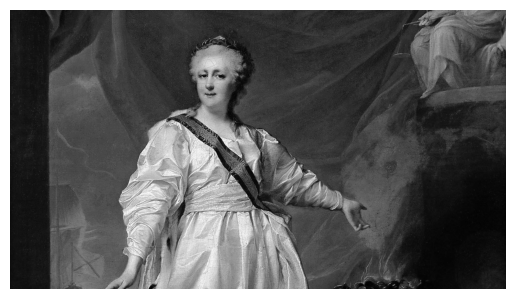

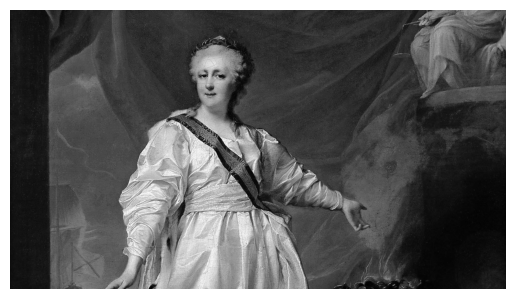

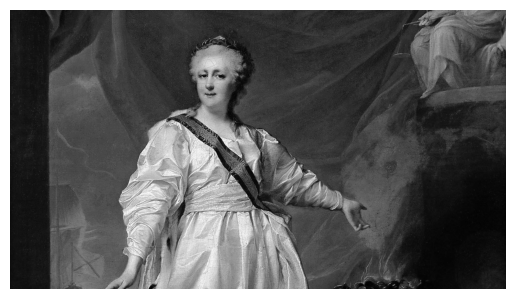

In [ ]:
import imageio.v3 as iio
import matplotlib.pyplot as plt

def plot_grayscale_result(grayscale_img):
    plt.imshow(grayscale_img, cmap='gray')
    plt.axis('off')
    plt.show()

weights = np.array([0.299, 0.587, 0.114])
img = iio.imread('ekaterina.png')

print(img.shape)

# Вызов функций для разных изображений
grayscale_img_v = grayscale_vectorized(img, weights)
grayscale_img_pv = grayscale_partial_vectorized(img, weights)
grayscale_img_l = grayscale_loops(img, weights)

# Показ результатов
plot_grayscale_result(grayscale_img_v)
plot_grayscale_result(grayscale_img_pv)
plot_grayscale_result(grayscale_img_l)

In [17]:
import numpy as np

# Загрузка изображения (предположим, что изображение в формате RGB)
img = np.random.rand(100, 100, 3)  # Для примера создаём случайное изображение
weights = np.array([0.299, 0.587, 0.114])

# Сравнение времени для различных размеров данных
x_large = np.random.rand(10000, 10000, 3)
x_medium = np.random.rand(1000, 1000, 3)
x_small = np.random.rand(100, 100, 3)

# Время для маленьких массивов
print("\nВремя для маленького набора данных (100x100):")
%timeit grayscale_vectorized(x_small, weights)
%timeit grayscale_partial_vectorized(x_small, weights)
%timeit grayscale_loops(x_small, weights)

# Время для средних массивов
print("\nВремя для среднего набора данных (1000x1000):")
%timeit grayscale_vectorized(x_medium, weights)
%timeit grayscale_partial_vectorized(x_medium, weights)
%timeit grayscale_loops(x_medium, weights)

# Время для больших массивов
print("\nВремя для большого набора данных (10000x10000):")
%timeit grayscale_vectorized(x_large, weights)
%timeit grayscale_partial_vectorized(x_large, weights)
# %timeit grayscale_loops(x_large, weights)  #! очень долго



Время для маленького набора данных (100x100):
96.2 μs ± 1.5 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
168 μs ± 4.79 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
7.53 ms ± 173 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)

Время для среднего набора данных (1000x1000):
10.1 ms ± 277 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
20 ms ± 309 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
848 ms ± 75.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

Время для большого набора данных (10000x10000):
1.14 s ± 86.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.13 s ± 83.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


KeyboardInterrupt: 

In [18]:
def run_length_encoding_loops(x):
    numbers = []
    counts = []
    
    current_number = x[0]
    count = 1
    
    for i in range(1, len(x)):
        if x[i] == current_number:
            count += 1
        else:
            numbers.append(current_number)
            counts.append(count)
            current_number = x[i]
            count = 1
    
    # Добавляем последний элемент
    numbers.append(current_number)
    counts.append(count)
    
    return np.array(numbers), np.array(counts)

In [19]:
def run_length_encoding_partial_vectorized(x):
    # Находим различия между соседними элементами
    diff = np.diff(x)
    change_indices = np.where(diff != 0)[0] + 1  # Индексы изменения
    
    # Добавляем первый элемент
    numbers = np.insert(x[change_indices], 0, x[0])
    counts = np.diff(np.concatenate(([0], change_indices, [len(x)])))
    
    return numbers, counts

In [22]:
def run_length_encoding_vectorized(x):
    # Находим места, где элементы меняются
    change_indices = np.where(np.diff(x) != 0)[0] + 1
    numbers = np.insert(x[change_indices], 0, x[0])
    counts = np.diff(np.concatenate(([0], change_indices, [len(x)])))
    
    return numbers, counts

In [ ]:
# Пример данных
x = np.array([2, 2, 2, 3, 3, 3, 5, 2, 2])

# 1. Метод с циклами
numbers_loops, counts_loops = run_length_encoding_loops(x)
print("\nМетод с циклами:")
print("Numbers:", numbers_loops)
print("Counts:", counts_loops)

# 2. Частично векторизованный метод
numbers_partial, counts_partial = run_length_encoding_partial_vectorized(x)
print("\nЧастично векторизованный метод:")
print("Numbers:", numbers_partial)
print("Counts:", counts_partial)

# 3. Векторизованный метод
numbers_vectorized, counts_vectorized = run_length_encoding_vectorized(x)
print("\nВекторизованный метод:")
print("Numbers:", numbers_vectorized)
print("Counts:", counts_vectorized)


Метод с циклами:
Numbers: [2 3 5 2]
Counts: [3 3 1 2]

Частично векторизованный метод:
Numbers: [2 3 5 2]
Counts: [3 3 1 2]

Векторизованный метод:
Numbers: [2 3 5 2]
Counts: [3 3 1 2]


In [24]:
# Пример с различными размерами данных
x_large = np.random.randint(0, 10, size=10000)
x_medium = np.random.randint(0, 10, size=1000)
x_small = np.random.randint(0, 10, size=100)

# Время для маленького набора данных
print("\nВремя для маленького набора данных (100):")
%timeit run_length_encoding_loops(x_small)
%timeit run_length_encoding_partial_vectorized(x_small)
%timeit run_length_encoding_vectorized(x_small)

# Время для среднего набора данных
print("\nВремя для среднего набора данных (1000):")
%timeit run_length_encoding_loops(x_medium)
%timeit run_length_encoding_partial_vectorized(x_medium)
%timeit run_length_encoding_vectorized(x_medium)

# Время для большого набора данных
print("\nВремя для большого набора данных (10000):")
%timeit run_length_encoding_loops(x_large)
%timeit run_length_encoding_partial_vectorized(x_large)
%timeit run_length_encoding_vectorized(x_large)


Время для маленького набора данных (100):
19.5 μs ± 1.25 μs per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
14.5 μs ± 720 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
15.3 μs ± 849 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)

Время для среднего набора данных (1000):
199 μs ± 9.81 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
17.7 μs ± 529 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
17.6 μs ± 301 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)

Время для большого набора данных (10000):
1.89 ms ± 55.4 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
36.4 μs ± 879 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
37.6 μs ± 1.72 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [27]:
def euclidean_distance_loops(X, Y):
    n, m = X.shape
    p, q = Y.shape
    dist_matrix = np.zeros((n, p))
    
    for i in range(n):
        for j in range(p):
            dist_matrix[i, j] = np.sqrt(np.sum((X[i] - Y[j])**2))
    
    return dist_matrix

In [28]:
def euclidean_distance_numpy(X, Y):
    # Матричное вычитание и вычисление расстояний
    return np.sqrt(((X[:, np.newaxis] - Y)**2).sum(axis=2))

In [31]:
from scipy.spatial.distance import cdist

def euclidean_distance_scipy(X, Y):
    return cdist(X, Y, metric='euclidean')

In [ ]:
X = np.array([[1, 2], [3, 4], [5, 6]])
Y = np.array([[7, 8], [9, 10]])

dist_matrix_loops = euclidean_distance_loops(X, Y)
dist_matrix_numpy = euclidean_distance_numpy(X, Y)
dist_matrix_scipy = euclidean_distance_scipy(X, Y)

# Сравнение результатов
print("Сравнение результатов:")
print("\nМатрица расстояний (метод с циклами):")
print(dist_matrix_loops)

print("\nМатрица расстояний (метод NumPy):")
print(dist_matrix_numpy)

print("\nМатрица расстояний (scipy.spatial.distance.cdist):")
print(dist_matrix_scipy)


Сравнение результатов:
Матрица расстояний (метод с циклами):
[[ 8.48528137 11.3137085 ]
 [ 5.65685425  8.48528137]
 [ 2.82842712  5.65685425]]

Матрица расстояний (метод NumPy):
[[ 8.48528137 11.3137085 ]
 [ 5.65685425  8.48528137]
 [ 2.82842712  5.65685425]]

Матрица расстояний (scipy.spatial.distance.cdist):
[[ 8.48528137 11.3137085 ]
 [ 5.65685425  8.48528137]
 [ 2.82842712  5.65685425]]


In [34]:
# Пример с различными размерами данных
x_large = np.random.randint(0, 10, size=10000)
x_medium = np.random.randint(0, 10, size=1000)
x_small = np.random.randint(0, 10, size=100)

# Время для маленького набора данных
print("\nВремя для маленького набора данных (100):")
%timeit run_length_encoding_loops(x_small)
%timeit run_length_encoding_partial_vectorized(x_small)
%timeit run_length_encoding_vectorized(x_small)

# Время для среднего набора данных
print("\nВремя для среднего набора данных (1000):")
%timeit run_length_encoding_loops(x_medium)
%timeit run_length_encoding_partial_vectorized(x_medium)
%timeit run_length_encoding_vectorized(x_medium)

# Время для большого набора данных
print("\nВремя для большого набора данных (10000):")
%timeit run_length_encoding_loops(x_large)
%timeit run_length_encoding_partial_vectorized(x_large)
%timeit run_length_encoding_vectorized(x_large)


Время для маленького набора данных (100):
18.4 μs ± 822 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
18.1 μs ± 2.97 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
14.5 μs ± 957 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)

Время для среднего набора данных (1000):
194 μs ± 8.98 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
17.3 μs ± 450 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
17.4 μs ± 331 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)

Время для большого набора данных (10000):
1.89 ms ± 57.9 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
36.7 μs ± 595 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
36.6 μs ± 764 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
